# Importing necessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
import datetime
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
import seaborn as sns
sns.set()
%load_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.imports import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

# Loading the dataset

In [2]:
coinbase=pd.read_csv('/content/coinbase.csv')

In [3]:
coinbase.shape

(1574274, 8)

# Data exploration

In [4]:
coinbase.head()

Timestamp   Open   High    Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1417411980  300.0  300.0  300.0  300.0          0.01                3.0   
1  1417412040  300.0  300.0  300.0  300.0          0.01                3.0   
2  1417412100  300.0  300.0  300.0  300.0          0.01                3.0   
3  1417412160  300.0  300.0  300.0  300.0          0.01                3.0   
4  1417412220  300.0  300.0  300.0  300.0          0.01                3.0   

   Weighted_Price  
0           300.0  
1           300.0  
2           300.0  
3           300.0  
4           300.0

In [5]:
coinbase.tail()

Timestamp      Open      High       Low     Close  Volume_(BTC)  \
1574269  1515369360  16174.21  16174.23  16174.21  16174.23      7.594119   
1574270  1515369420  16174.23  16174.23  16174.21  16174.22     11.902468   
1574271  1515369480  16174.22  16174.22  16174.21  16174.21      3.860840   
1574272  1515369540  16174.22  16174.22  16174.21  16174.22      1.179093   
1574273  1515369600  16174.22  16174.23  16174.22  16174.22      5.401224   

         Volume_(Currency)  Weighted_Price  
1574269      122828.956770    16174.221301  
1574270      192513.150940    16174.221081  
1574271       62446.073684    16174.218136  
1574272       19070.914509    16174.219514  
1574273       87360.593222    16174.220219

In [6]:
coinbase.describe()

Timestamp          Open          High           Low         Close  \
count  1.574274e+06  1.574274e+06  1.574274e+06  1.574274e+06  1.574274e+06   
mean   1.468131e+09  1.705118e+03  1.706025e+03  1.704113e+03  1.705123e+03   
std    2.728500e+07  3.059038e+03  3.061434e+03  3.056505e+03  3.059105e+03   
min    1.417412e+09  6.000000e-02  6.000000e-02  6.000000e-02  6.000000e-02   
25%    1.444527e+09  2.903000e+02  2.904100e+02  2.901800e+02  2.903000e+02   
50%    1.468141e+09  5.900500e+02  5.902100e+02  5.899800e+02  5.900200e+02   
75%    1.491756e+09  1.224490e+03  1.224810e+03  1.224090e+03  1.224490e+03   
max    1.515370e+09  1.989199e+04  1.989199e+04  1.989198e+04  1.989199e+04   

       Volume_(BTC)  Volume_(Currency)  Weighted_Price  
count  1.574274e+06       1.574274e+06    1.574274e+06  
mean   7.073412e+00       2.267928e+04    1.705069e+03  
std    1.698569e+01       1.225156e+05    3.058976e+03  
min    1.000000e-08       2.641700e-06    6.000000e-02  
25%    6.915000e-01       3.162361e+02    2.903031e+02  
50%    2.381500e+00       1.398624e+03    5.900207e+02  
75%    7.032457e+00       7.601787e+03    1.224453e+03  
max    1.563267e+03       1.997076e+07    1.989199e+04

# As timestamp values are not humanly readable, let's convert it into a normal date first

In [7]:
def timestampToDateTime(timestamp):
    from datetime import datetime
    return datetime.fromtimestamp(timestamp)
coinbase['Date']=coinbase['Timestamp'].apply(timestampToDateTime)

In [8]:
coinbase.head()

Timestamp   Open   High    Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1417411980  300.0  300.0  300.0  300.0          0.01                3.0   
1  1417412040  300.0  300.0  300.0  300.0          0.01                3.0   
2  1417412100  300.0  300.0  300.0  300.0          0.01                3.0   
3  1417412160  300.0  300.0  300.0  300.0          0.01                3.0   
4  1417412220  300.0  300.0  300.0  300.0          0.01                3.0   

   Weighted_Price                Date  
0           300.0 2014-12-01 05:33:00  
1           300.0 2014-12-01 05:34:00  
2           300.0 2014-12-01 05:35:00  
3           300.0 2014-12-01 05:36:00  
4           300.0 2014-12-01 05:37:00

# Let's get rid of the timestamp Now

In [9]:
coinbase.drop('Timestamp',axis=1,inplace=True) 

In [10]:
coinbase.head()

Open   High    Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  300.0  300.0  300.0  300.0          0.01                3.0   
1  300.0  300.0  300.0  300.0          0.01                3.0   
2  300.0  300.0  300.0  300.0          0.01                3.0   
3  300.0  300.0  300.0  300.0          0.01                3.0   
4  300.0  300.0  300.0  300.0          0.01                3.0   

   Weighted_Price                Date  
0           300.0 2014-12-01 05:33:00  
1           300.0 2014-12-01 05:34:00  
2           300.0 2014-12-01 05:35:00  
3           300.0 2014-12-01 05:36:00  
4           300.0 2014-12-01 05:37:00

In [11]:
coinbase[coinbase['Date']=='2016']

Open    High     Low   Close  Volume_(BTC)  Volume_(Currency)  \
511553  430.35  430.39  430.35  430.39        0.0727          31.288653   

        Weighted_Price       Date  
511553      430.380371 2016-01-01

In [12]:
timeindex=pd.DatetimeIndex(coinbase['Date'])

In [13]:
coinbase.set_index(timeindex,inplace=True)

In [14]:
coinbase['2016-01-21'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


Open    High     Low   Close  Volume_(BTC)  \
Date                                                                
2016-01-21 00:00:00  418.89  419.22  418.72  418.72      7.564173   
2016-01-21 00:01:00  418.90  418.97  418.76  418.78     16.812530   
2016-01-21 00:02:00  418.94  418.99  418.94  418.96     31.659400   
2016-01-21 00:03:00  419.01  419.01  418.96  418.96     12.206630   
2016-01-21 00:04:00  418.99  419.00  418.99  418.99     10.416198   

                     Volume_(Currency)  Weighted_Price                Date  
Date                                                                        
2016-01-21 00:00:00        3169.440356      419.006862 2016-01-21 00:00:00  
2016-01-21 00:01:00        7040.824523      418.784354 2016-01-21 00:01:00  
2016-01-21 00:02:00       13264.092180      418.962210 2016-01-21 00:02:00  
2016-01-21 00:03:00        5114.149465      418.964896 2016-01-21 00:03:00  
2016-01-21 00:04:00        4364.289083      418.990585 2016-01-21 00:04:00

As we noticed there are few NAN values and we dont want to drop those values. Since it is a time series data, we need to be extremely careful how we handle these values. There are two options:

Fill the missing values with previous values (forward fill)
Fill the missing values with future values (backward fill)
We choose forward Fill

In [15]:
coinbase=coinbase.fillna(method='ffill')

In [16]:
coinbase.corr()

Open      High       Low     Close  Volume_(BTC)  \
Open               1.000000  0.999997  0.999997  0.999996      0.204421   
High               0.999997  1.000000  0.999994  0.999998      0.204978   
Low                0.999997  0.999994  1.000000  0.999997      0.203783   
Close              0.999996  0.999998  0.999997  1.000000      0.204399   
Volume_(BTC)       0.204421  0.204978  0.203783  0.204399      1.000000   
Volume_(Currency)  0.497802  0.498775  0.496770  0.497814      0.575376   
Weighted_Price     0.999999  0.999998  0.999998  0.999999      0.204366   

                   Volume_(Currency)  Weighted_Price  
Open                        0.497802        0.999999  
High                        0.498775        0.999998  
Low                         0.496770        0.999998  
Close                       0.497814        0.999999  
Volume_(BTC)                0.575376        0.204366  
Volume_(Currency)           1.000000        0.497755  
Weighted_Price              0.497755        1.000000

We predict the price for the bitcoin after 2 days in this case. Therefore we need to prepare the dataframe with input row as todays price and predictor as price after 2 days.

In [17]:
coinbase['PriceClose2D']=coinbase['Close']

In [18]:
shift=24 # 24 hours = 2days 
coinbase['PriceClose2D']=coinbase['PriceClose2D'].shift(-shift)
coinbase=coinbase[:-shift]

In [19]:
coinbase[73:90]

Open   High    Low  Close  Volume_(BTC)  \
Date                                                            
2014-12-01 06:46:00  370.0  370.0  370.0  370.0      0.010000   
2014-12-01 06:47:00  370.0  370.0  370.0  370.0      0.010000   
2014-12-01 06:48:00  370.0  370.0  370.0  370.0      0.010000   
2014-12-01 06:49:00  370.0  370.0  370.0  370.0      0.010000   
2014-12-01 06:50:00  370.0  370.0  370.0  370.0      0.026556   
2014-12-01 06:51:00  370.0  370.0  370.0  370.0      0.026556   
2014-12-01 06:52:00  370.0  370.0  370.0  370.0      0.026556   
2014-12-01 06:53:00  370.0  370.0  370.0  370.0      0.026556   
2014-12-01 06:54:00  370.0  370.0  370.0  370.0      0.026556   
2014-12-01 06:55:00  370.0  370.0  370.0  370.0      0.026556   
2014-12-01 06:56:00  370.0  370.0  370.0  370.0      0.026556   
2014-12-01 06:57:00  370.0  370.0  370.0  370.0      0.026556   
2014-12-01 06:58:00  370.0  370.0  370.0  370.0      0.026556   
2014-12-01 06:59:00  370.0  370.0  370.0  370.0      0.026556   
2014-12-01 07:00:00  370.0  370.0  370.0  370.0      0.026556   
2014-12-01 07:01:00  370.0  370.0  370.0  370.0      0.026556   
2014-12-01 07:02:00  370.0  370.0  370.0  370.0      0.026556   

                     Volume_(Currency)  Weighted_Price                Date  \
Date                                                                         
2014-12-01 06:46:00            3.70000           370.0 2014-12-01 06:46:00   
2014-12-01 06:47:00            3.70000           370.0 2014-12-01 06:47:00   
2014-12-01 06:48:00            3.70000           370.0 2014-12-01 06:48:00   
2014-12-01 06:49:00            3.70000           370.0 2014-12-01 06:49:00   
2014-12-01 06:50:00            9.82555           370.0 2014-12-01 06:50:00   
2014-12-01 06:51:00            9.82555           370.0 2014-12-01 06:51:00   
2014-12-01 06:52:00            9.82555           370.0 2014-12-01 06:52:00   
2014-12-01 06:53:00            9.82555           370.0 2014-12-01 06:53:00   
2014-12-01 06:54:00            9.82555           370.0 2014-12-01 06:54:00   
2014-12-01 06:55:00            9.82555           370.0 2014-12-01 06:55:00   
2014-12-01 06:56:00            9.82555           370.0 2014-12-01 06:56:00   
2014-12-01 06:57:00            9.82555           370.0 2014-12-01 06:57:00   
2014-12-01 06:58:00            9.82555           370.0 2014-12-01 06:58:00   
2014-12-01 06:59:00            9.82555           370.0 2014-12-01 06:59:00   
2014-12-01 07:00:00            9.82555           370.0 2014-12-01 07:00:00   
2014-12-01 07:01:00            9.82555           370.0 2014-12-01 07:01:00   
2014-12-01 07:02:00            9.82555           370.0 2014-12-01 07:02:00   

                     PriceClose2D  
Date                               
2014-12-01 06:46:00         370.0  
2014-12-01 06:47:00         370.0  
2014-12-01 06:48:00         370.0  
2014-12-01 06:49:00         370.0  
2014-12-01 06:50:00         370.0  
2014-12-01 06:51:00         370.0  
2014-12-01 06:52:00         370.0  
2014-12-01 06:53:00         370.0  
2014-12-01 06:54:00         370.0  
2014-12-01 06:55:00         370.0  
2014-12-01 06:56:00         370.0  
2014-12-01 06:57:00         370.0  
2014-12-01 06:58:00         370.0  
2014-12-01 06:59:00         370.0  
2014-12-01 07:00:00         370.0  
2014-12-01 07:01:00         370.0  
2014-12-01 07:02:00         370.0

## **TRAINING AND TESTING**

## Model 1: Recurrent Neural Networks with LSTM and GRU (Seq to Seq) :0

In [20]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from pandas import Series

In [21]:
data=pd.read_csv('/content/bitcoin2020daily.csv')

In [22]:
data=data.set_index(pd.DatetimeIndex(data['Date']))['Close']

In [23]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
look_back=3

In [24]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        #takes 
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [25]:
# fix random seed for reproducibility
numpy.random.seed(0)

In [26]:
# load the dataset
dataframe = data
dataset = dataframe.values
dataset = dataset.astype('float64').reshape(-1, 1)

In [27]:
# normalize the dataset
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [28]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [29]:
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [30]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [31]:
# create and fit the LSTM network
from keras.layers import Activation, Dense,Dropout
model = Sequential()
model.add(LSTM(256, return_sequences=True,input_shape=(1, look_back)))
model.add(LSTM(256))
model.add(Dense(1))

In [32]:
import keras
from keras import optimizers
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, verbose=1,shuffle=False,batch_size=50)

Epoch 1/50
5/5 [==============================] - 4s 20ms/step - loss: 0.2013
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 0.1422
Epoch 3/50
5/5 [==============================] - 0s 17ms/step - loss: 0.0806
Epoch 4/50
5/5 [==============================] - 0s 18ms/step - loss: 0.0302
Epoch 5/50
5/5 [==============================] - 0s 16ms/step - loss: 0.0165
Epoch 6/50
5/5 [==============================] - 0s 19ms/step - loss: 0.0236
Epoch 7/50
5/5 [==============================] - 0s 19ms/step - loss: 0.0139
Epoch 8/50
5/5 [==============================] - 0s 18ms/step - loss: 0.0100
Epoch 9/50
5/5 [==============================] - 0s 17ms/step - loss: 0.0114
Epoch 10/50
5/5 [==============================] - 0s 24ms/step - loss: 0.0099
Epoch 11/50
5/5 [==============================] - 0s 18ms/step - loss: 0.0076
Epoch 12/50
5/5 [==============================] - 0s 17ms/step - loss: 0.0067
Epoch 13/50
5/5 [==============================] - 0s 19ms/st

In [33]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [34]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [35]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
predictions = numpy.empty_like(dataset)
predictions[:, :] = numpy.nan
predictions[look_back:len(trainPredict)+look_back, :] = trainPredict
predictions[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
predictionsDF=pd.DataFrame(predictions,columns=["predicted"],index=dataframe.index)
ans=pd.concat([dataframe,predictionsDF],axis=1)
print( ans,[look_back,trainScore,testScore])

Train Score: 2133.42 RMSE
Test Score: 2104.11 RMSE
                   Close     predicted
Date                                  
2021-01-01  29374.152344           NaN
2021-01-02  32127.267578           NaN
2021-01-03  32782.023438           NaN
2021-01-04  31971.914063  32820.117188
2021-01-05  33992.429688  33034.574219
...                  ...           ...
2021-12-27  50640.417969  50348.332031
2021-12-28  47588.855469  50325.285156
2021-12-29  46444.710938  48776.492188
2021-12-30  47178.125000  47179.171875
2021-12-31  46306.445313           NaN

[365 rows x 2 columns] [3, 2133.416517010023, 2104.113247880661]


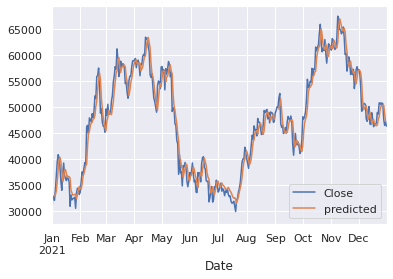

In [36]:
ans.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


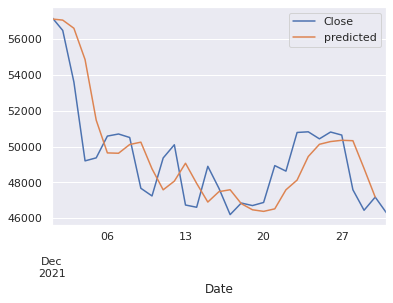

In [37]:
ans['2021-12'].plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


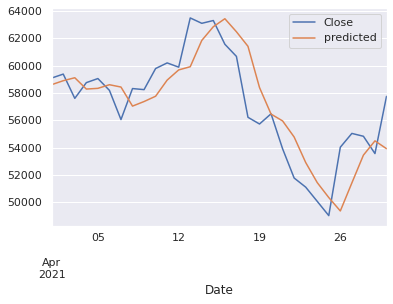

In [38]:
ans['2021-4'].plot()

## Model 2: ARIMA MODEL

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Exploration

In [40]:
df = pd.read_csv('/content/dataset.csv')
df.head()

Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980  4.39  4.39  4.39   4.39      0.455581                2.0   
2  1325318040  4.39  4.39  4.39   4.39      0.455581                2.0   
3  1325318100  4.39  4.39  4.39   4.39      0.455581                2.0   
4  1325318160  4.39  4.39  4.39   4.39      0.455581                2.0   

   Weighted_Price  
0            4.39  
1            4.39  
2            4.39  
3            4.39  
4            4.39

In [41]:
df.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [42]:
#Unix-time to 
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
#print(df.Timestamp)

# Resampling to daily frequency
df.index = df.Timestamp
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

In [43]:
#Now we will be using timestamp converted to months for our analysis out of all the above conversion
df_month.head()

Open      High       Low     Close  Volume_(BTC)  \
Timestamp                                                          
2011-12-31  4.472552  4.472624  4.472552  4.472624      7.590527   
2012-01-31  6.235412  6.239745  6.231737  6.236086      4.955810   
2012-02-29  5.234146  5.234743  5.231709  5.232306      7.153212   
2012-03-31  4.960839  4.961539  4.953547  4.953967     13.455398   
2012-04-30  4.980709  4.982016  4.979536  4.980802     18.732216   

            Volume_(Currency)  Weighted_Price  
Timestamp                                      
2011-12-31          34.069690        4.472579  
2012-01-31          29.527545        6.234949  
2012-02-29          37.120786        5.232734  
2012-03-31          66.445048        4.958308  
2012-04-30          92.674707        4.980866

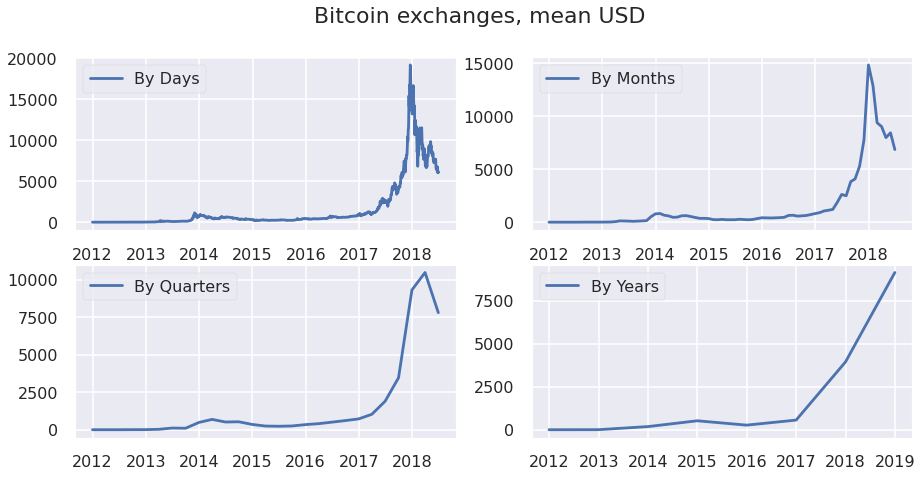

In [44]:
# PLOTS the timestamped data, in various different forms - days, months, quaters, yearly
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='By Years')
plt.legend()


plt.show()

In [45]:
# splitting dataset in 2/3 for training and 1/3 for testing purpose

split = 50
df_train = df_month[:split]
df_test = df_month[split:len(df_month)]

Dickey–Fuller test: p=0.470285


<Figure size 1080x504 with 0 Axes>

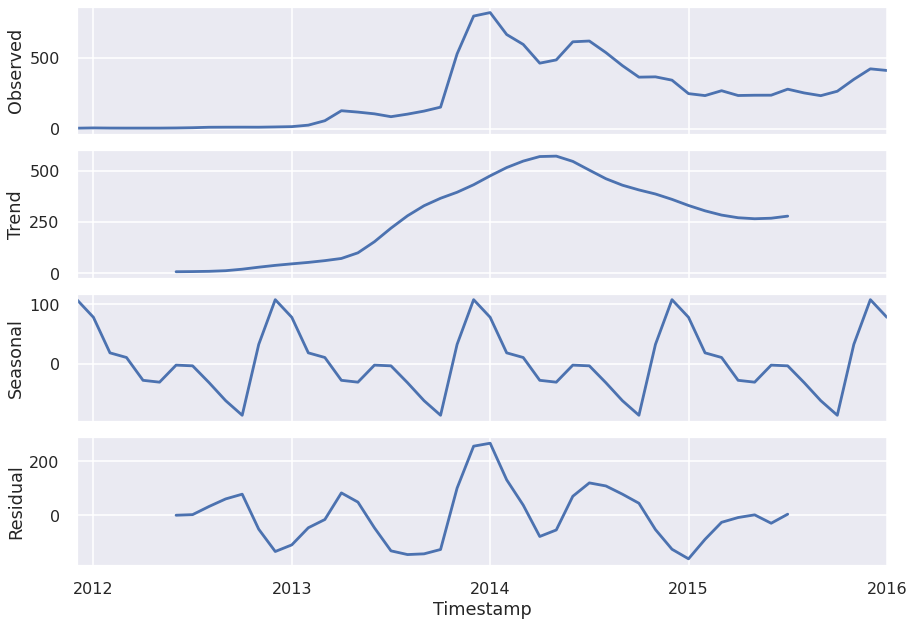

In [46]:
#All the Timeseries algorithms works well with Stationary Dataset (add definition)
# Also add definition of non-stationary dataset

# We are using Dicky-Fully Test to check whether a dataset is stationary of not 
# if val<0.05, then the dataset is stationary
# else, dataset set is stationary

# To make a dataset stationary we will perform various transforms and 
# to predict the final output we will be performing the inverse of those transforms

# Stationarity check for Original Dataset

plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_train.Weighted_Price).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_train.Weighted_Price)[1])
plt.show()

In [47]:
# Now we are performing Box-Cox transform and then check whether the dataset has become stationary or not

# Box-Cox Transformations 

df_train['Weighted_Price_box'], lmbda = stats.boxcox(df_train.Weighted_Price)

# Stationary Check again the value is more than 0.05

print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_train.Weighted_Price)[1])

Dickey–Fuller test: p=0.470285


In [48]:
#Now we are performing Seasonal

#Seasonal differentiation

df_train['prices_box_diff'] = df_train.Weighted_Price_box - df_train.Weighted_Price_box.shift(12)

print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_train.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.104669


Dickey–Fuller test: p=0.003063


<Figure size 1080x504 with 0 Axes>

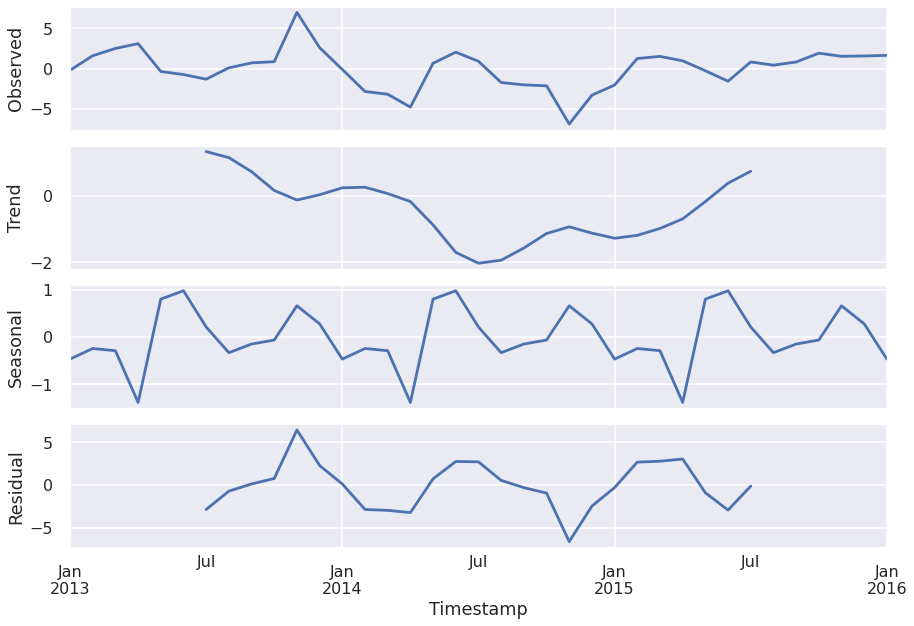

In [49]:
# Regular differentiation

df_train['prices_box_diff2'] = df_train.prices_box_diff - df_train.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df_train.prices_box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_train.prices_box_diff2[13:])[1])

plt.show()

In [50]:
# Initial approximation of parameters

Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
# print(parameters_list)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_train.Weighted_Price_box, order=(param[0], d, param[1])).fit()
    except ValueError:
        continue
    aic = model.aic
    # print(aic)
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [51]:
print(results)

[[(0, 0, 0, 0), 176.06178795688328], [(0, 0, 0, 1), 176.06178795688328], [(0, 0, 1, 0), 176.06178795688328], [(0, 0, 1, 1), 176.06178795688328], [(0, 0, 2, 0), 176.06178795688328], [(0, 0, 2, 1), 176.06178795688328], [(0, 1, 0, 0), 166.16523152283042], [(0, 1, 0, 1), 166.16523152283042], [(0, 1, 1, 0), 166.16523152283042], [(0, 1, 1, 1), 166.16523152283042], [(0, 1, 2, 0), 166.16523152283042], [(0, 1, 2, 1), 166.16523152283042], [(0, 2, 0, 0), 166.97761930668375], [(0, 2, 0, 1), 166.97761930668375], [(0, 2, 1, 0), 166.97761930668375], [(0, 2, 1, 1), 166.97761930668375], [(0, 2, 2, 0), 166.97761930668375], [(0, 2, 2, 1), 166.97761930668375], [(1, 0, 0, 0), 166.63873849499356], [(1, 0, 0, 1), 166.63873849499356], [(1, 0, 1, 0), 166.63873849499356], [(1, 0, 1, 1), 166.63873849499356], [(1, 0, 2, 0), 166.63873849499356], [(1, 0, 2, 1), 166.63873849499356], [(1, 1, 0, 0), 167.33167478734836], [(1, 1, 0, 1), 167.33167478734836], [(1, 1, 1, 0), 167.33167478734836], [(1, 1, 1, 1), 167.33167478

In [52]:
# Best Models

#result_table = pd.DataFrame(pd.np.empty((0, 2)))
results

[[(0, 0, 0, 0), 176.06178795688328],
 [(0, 0, 0, 1), 176.06178795688328],
 [(0, 0, 1, 0), 176.06178795688328],
 [(0, 0, 1, 1), 176.06178795688328],
 [(0, 0, 2, 0), 176.06178795688328],
 [(0, 0, 2, 1), 176.06178795688328],
 [(0, 1, 0, 0), 166.16523152283042],
 [(0, 1, 0, 1), 166.16523152283042],
 [(0, 1, 1, 0), 166.16523152283042],
 [(0, 1, 1, 1), 166.16523152283042],
 [(0, 1, 2, 0), 166.16523152283042],
 [(0, 1, 2, 1), 166.16523152283042],
 [(0, 2, 0, 0), 166.97761930668375],
 [(0, 2, 0, 1), 166.97761930668375],
 [(0, 2, 1, 0), 166.97761930668375],
 [(0, 2, 1, 1), 166.97761930668375],
 [(0, 2, 2, 0), 166.97761930668375],
 [(0, 2, 2, 1), 166.97761930668375],
 [(1, 0, 0, 0), 166.63873849499356],
 [(1, 0, 0, 1), 166.63873849499356],
 [(1, 0, 1, 0), 166.63873849499356],
 [(1, 0, 1, 1), 166.63873849499356],
 [(1, 0, 2, 0), 166.63873849499356],
 [(1, 0, 2, 1), 166.63873849499356],
 [(1, 1, 0, 0), 167.33167478734836],
 [(1, 1, 0, 1), 167.33167478734836],
 [(1, 1, 1, 0), 167.33167478734836],
 

In [53]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

print(best_model.summary())

      parameters         aic
8   (0, 1, 1, 0)  166.165232
11  (0, 1, 2, 1)  166.165232
10  (0, 1, 2, 0)  166.165232
6   (0, 1, 0, 0)  166.165232
7   (0, 1, 0, 1)  166.165232
                           Statespace Model Results                           
Dep. Variable:     Weighted_Price_box   No. Observations:                   50
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 -81.083
Date:                Fri, 29 Apr 2022   AIC                            166.165
Time:                        23:13:00   BIC                            169.949
Sample:                    12-31-2011   HQIC                           167.601
                         - 01-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4630      0.223    

Dickey–Fuller test:: p=0.004201


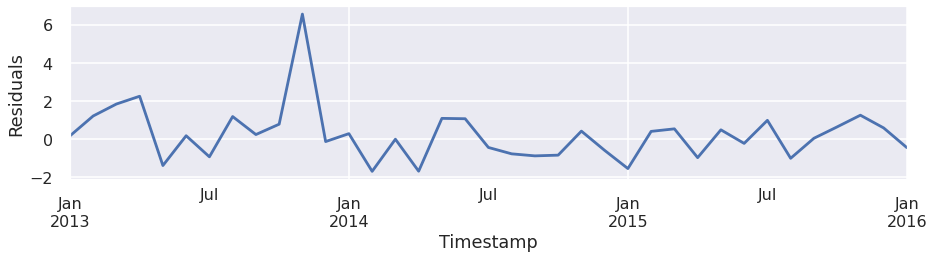

In [54]:
# STL-decomposition

from pandas import Series
from matplotlib import pyplot

plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

pyplot.show()

In [55]:
#Prediction 

# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

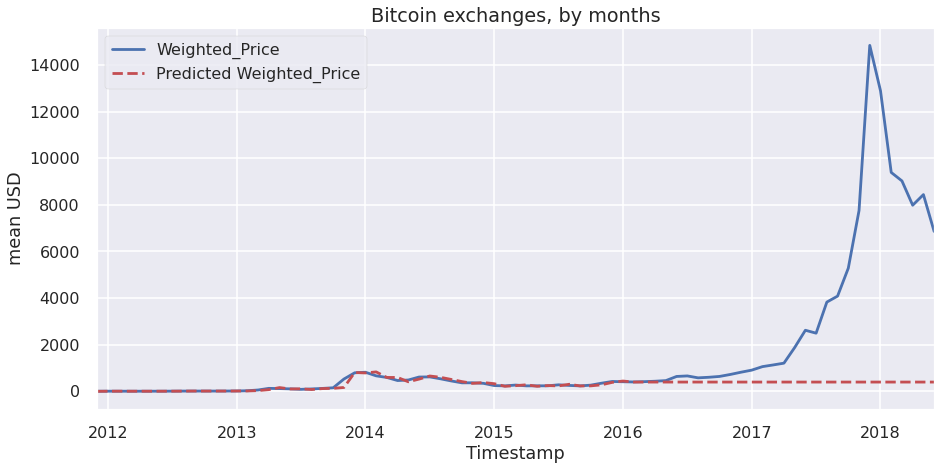

In [56]:
df_month2 = df_month[['Weighted_Price']]

df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=100), lmbda)

plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()